In [20]:
import numpy as np
import pandas as pd
from mlx_lm import load, generate

In [21]:
model_mistral, tokenizer_mistral = load("mistralai/Mistral-7B-Instruct-v0.3")

Fetching 12 files: 100%|██████████| 12/12 [00:00<00:00, 181702.70it/s]


In [22]:
#Load Datadframe
df = pd.read_csv('Test_dataset(Real+Fake).csv')
df

,Headline,Source,Label
0,NASA’s Perseverance rover finds its first poss...,sciencenews.org,True
1,Sepsis tests take days putting patients at ri...,sciencenews.org,True
2,Nasa's DART asteroid unlocks complex history o...,https://timesofindia.indiatimes.com/,True
3,Say goodbye to back pain patients go for adva...,https://timesofindia.indiatimes.com/,True
4,Neurodivergent children more likely to develop...,https://timesofindia.indiatimes.com/,True
...,...,...,...
683,"""Google's parent company faces UK investigatio...",Synthetically Generated,False
684,"""Intel announces hiring spree to fund recovery...",Synthetically Generated,False
685,"""Ola Electric IPO grey market premium skyrocke...",Synthetically Generated,False
686,"""Japan's Nikkei 225 Index Soars 12.4%, Its Big...",Synthetically Generated,False


<Axes: ylabel='Label'>

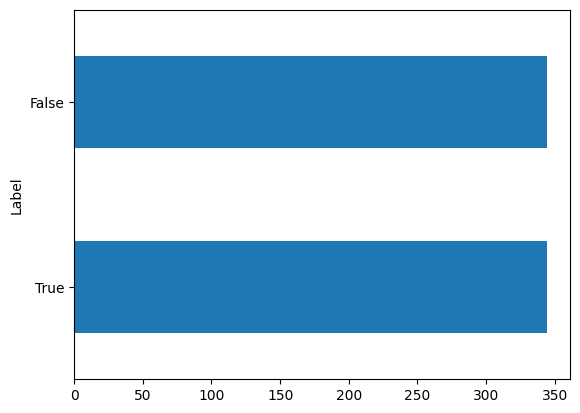

In [23]:
df['Label'].value_counts().plot(kind='barh')

In [24]:
def generate_question_Mistral(headline, model, tokenizer):
    query = f'''<\s>[INST] You're tasked with fact-checking news headlines for accuracy. 
    Given a headline, generate 1 question that needs to be true to verify the 
    headlines authenticity using a Google search to scrape the answer from the quick search box. 
    Ask the crucial questions first. Your output should only be one question in string for me to ingest in my backend without any other text.
    The headline is : {headline}< [/INST] '''
    response = generate(model, tokenizer, prompt=query)
    print(f"Headline: {headline}")
    print(f'Generated Question: {response}')
    print('-'*200)
    return response

# Apply the function to the 'title' column
df['Question_Mistral'] = df.apply(lambda row: generate_question_Mistral(row['Headline'], model_mistral, tokenizer_mistral), axis=1)

Headline: NASA’s Perseverance rover finds its first possible hint of ancient life on Mars
Generated Question: "Has NASA officially announced the discovery of possible ancient life by the Perseverance rover on Mars?"
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Headline: Sepsis tests take days  putting patients at risk. A new method may cut wait time
Generated Question: "Is there a recent study or research that shows a new method for sepsis tests that significantly reduces wait time, potentially lowering patient risk?"
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Headline: Nasa's DART asteroid unlocks complex history of twin space rock targets; see pics
Generated Question: "Has NA

In [25]:
df

,Headline,Source,Label,Question_Mistral
0,NASA’s Perseverance rover finds its first poss...,sciencenews.org,True,"""Has NASA officially announced the discovery o..."
1,Sepsis tests take days putting patients at ri...,sciencenews.org,True,"""Is there a recent study or research that show..."
2,Nasa's DART asteroid unlocks complex history o...,https://timesofindia.indiatimes.com/,True,"""Has NASA's DART mission provided evidence of ..."
3,Say goodbye to back pain patients go for adva...,https://timesofindia.indiatimes.com/,True,"""Has 'advanced endoscopy spine surgery for sci..."
4,Neurodivergent children more likely to develop...,https://timesofindia.indiatimes.com/,True,"""Is there a peer-reviewed study titled 'Neurod..."
...,...,...,...,...
683,"""Google's parent company faces UK investigatio...",Synthetically Generated,False,"""Has Alphabet Inc., Google's parent company, b..."
684,"""Intel announces hiring spree to fund recovery...",Synthetically Generated,False,"""Has Intel announced a hiring spree to fund re..."
685,"""Ola Electric IPO grey market premium skyrocke...",Synthetically Generated,False,"""Has the Ola Electric IPO grey market premium ..."
686,"""Japan's Nikkei 225 Index Soars 12.4%, Its Big...",Synthetically Generated,False,"1. ""Is there a news article from a reliable so..."


In [26]:
model_phi, tokenizer_phi = load("microsoft/Phi-3-mini-4k-instruct")

Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 139452.56it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [29]:
def generate_question_phi(headline, model, tokenizer):
    query = f'''
    <|user|>
    You're tasked with fact-checking news headlines for accuracy. 
    Given a headline, generate 1 question that needs to be true to verify the 
    headlines authenticity using a Google search to scrape the answer from the quick search box. 
    Ask the crucial questions first. Your output should only be one question in string for me to ingest in my backend without any other text. 
    The headline is : {headline}<|end|>
    <|assistant|>'''
    response = generate(model, tokenizer, prompt=query)
    response = response.replace('<|end|>','')
    print(f"Headline: {headline}")
    print(f'Generated Question: {response}')
    print('-'*200)
    return response

# Apply the function to the 'title' column
df['Question_phi'] = df.apply(lambda row: generate_question_phi(row['Headline'], model_phi, tokenizer_phi), axis=1)

Headline: NASA’s Perseverance rover finds its first possible hint of ancient life on Mars
Generated Question: "Has NASA's Perseverance rover discovered evidence of ancient life on Mars?"
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Headline: Sepsis tests take days  putting patients at risk. A new method may cut wait time
Generated Question: "What is the current average wait time for sepsis test results before the new method was introduced?"
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Headline: Nasa's DART asteroid unlocks complex history of twin space rock targets; see pics
Generated Question: "What is the history of NASA's DART mission and its twin space rock targets?"
--------

In [31]:
new_order = ['Headline', 'Source', 'Question_phi','Question_Mistral','Label']

df = df[new_order]
df

,Headline,Source,Question_phi,Question_Mistral,Label
0,NASA’s Perseverance rover finds its first poss...,sciencenews.org,"""Has NASA's Perseverance rover discovered evid...","""Has NASA officially announced the discovery o...",True
1,Sepsis tests take days putting patients at ri...,sciencenews.org,"""What is the current average wait time for sep...","""Is there a recent study or research that show...",True
2,Nasa's DART asteroid unlocks complex history o...,https://timesofindia.indiatimes.com/,"""What is the history of NASA's DART mission an...","""Has NASA's DART mission provided evidence of ...",True
3,Say goodbye to back pain patients go for adva...,https://timesofindia.indiatimes.com/,"""What are the benefits of advanced endoscopy s...","""Has 'advanced endoscopy spine surgery for sci...",True
4,Neurodivergent children more likely to develop...,https://timesofindia.indiatimes.com/,"""What does the study find about the likelihood...","""Is there a peer-reviewed study titled 'Neurod...",True
...,...,...,...,...,...
683,"""Google's parent company faces UK investigatio...",Synthetically Generated,"""Has Google's parent company been investigated...","""Has Alphabet Inc., Google's parent company, b...",False
684,"""Intel announces hiring spree to fund recovery...",Synthetically Generated,"""What is the current hiring status of Intel as...","""Has Intel announced a hiring spree to fund re...",False
685,"""Ola Electric IPO grey market premium skyrocke...",Synthetically Generated,"""What is the current grey market premium for O...","""Has the Ola Electric IPO grey market premium ...",False
686,"""Japan's Nikkei 225 Index Soars 12.4%, Its Big...",Synthetically Generated,"""What was the percentage increase in Japan's N...","1. ""Is there a news article from a reliable so...",False


In [33]:
n = 634
print(df['Headline'][n])
print(df['Question_phi'][n])
print(df['Question_Mistral'][n])
print(df['Label'][n]) 

"GST collection plummets below 10 per cent to Rs 1.82 lakh crore in July"
"What was the actual GST collection in India for the month of July?"
1. "Is the GST collection for July 2023 exactly Rs 1.82 lakh crore as stated in the headline?"
False


In [34]:
# df.to_csv('Final_Testing_Dataset.csv', index=False)